In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
imgs = list()
for i in range(2,21):
    img = mpimg.imread('./camera_cal/calibration{}.jpg'.format(i))
    imgs.append(img)

In [3]:
test_img = mpimg.imread('./camera_cal/calibration1.jpg')

In [4]:
objpoints = list()   # 3D points in real world space
imgpoints = list()   # 2D points

objp=np.zeros((6*9,3),np.float32)
objp[:,:2]=np.mgrid[0:9,0:6].T.reshape(-1,2)

for img in imgs:
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    ret, corners  = cv2.findChessboardCorners(gray, (9,6))
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

In [5]:
imgshape = gray.shape[::-1]
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, imgshape, None, None)
undist = cv2.undistort(test_img, mtx, dist, None, mtx)

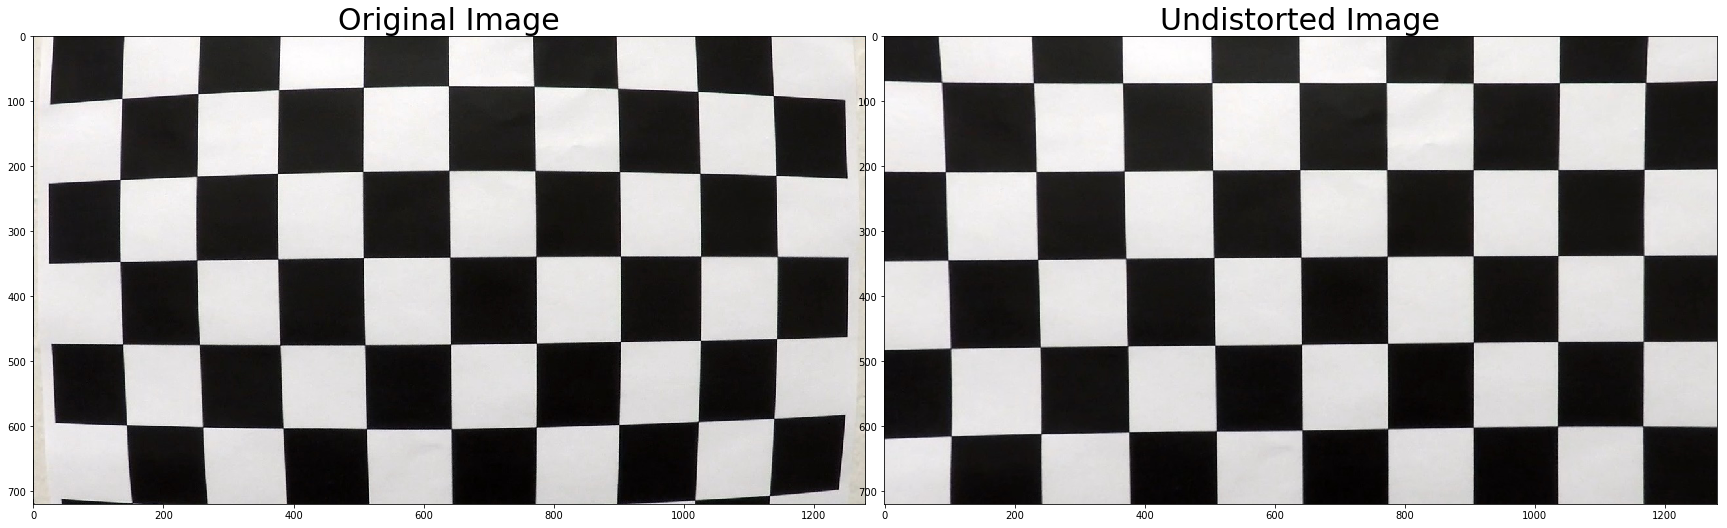

In [6]:
f = plt.figure(figsize=(24,9))

plt.subplot(1,2,1)
f.tight_layout()
plt.title('Original Image',fontsize=30)
plt.imshow(test_img)
plt.subplot(1,2,2)
plt.title('Undistorted Image',fontsize=30)
plt.imshow(undist)
plt.savefig('output_images/chessboard_distortion.png')


In [7]:
# Save the fitted camera parameters

pickle.dump(dict(mtx=mtx,dist=dist),open('Calibration.p','wb'))